<a href="https://colab.research.google.com/github/Rishi-128/ml4sci-anomaly-detection-dqm/blob/main/02_autoencoder_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The autoencoder is trained only on normal samples so that it learns a compressed representation of healthy detector behavior.
During inference, anomalous samples are expected to have higher reconstruction error, which can be used as an anomaly score.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic normal data
normal_data = np.random.randn(100, 10) # 100 samples, 10 features

# Convert numpy data to torch tensor
X_train = torch.tensor(normal_data, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 6),
            nn.ReLU(),
            nn.Linear(6, 10)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []

for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, X_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.1673
Epoch 5, Loss: 1.1598
Epoch 10, Loss: 1.1529
Epoch 15, Loss: 1.1465


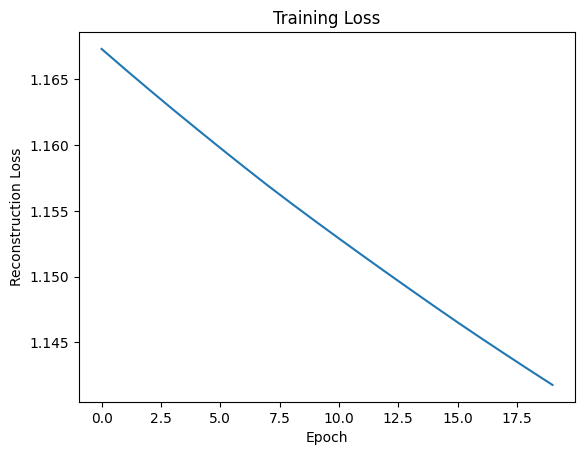

In [3]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("Training Loss")
plt.show()


In [4]:
torch.save(model.state_dict(), "autoencoder.pth")
print("Model saved successfully!")


Model saved successfully!
